trying to do kalman filtering just from simon's paper

In [5]:
%%capture clear
%pip install numpy
%pip install matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_axis = np.arange(-2,10,0.01)

# Kalman Filtering

* so we need to choose some noise say of covar 0.01 for both observation and target
* lets also choose to do a system with two variables x1 and x2
* ~~ lets also choose the dynamics of the system to be just a linear system say 0.5,0.5 ~~
* timesteps of one second
* we're also making all matricies and noise time invariant / constants to save some time

In [685]:
# just gives our random vars for v and n sampled form standard norm
#(then divided to make smaller)
covar_q = np.array([0.1,0.1])# this could vary in time in this case it doesn't
covar_r = np.array([0.1,0.1]) # same with this one
def v_func()->list[float]:
    return np.multiply(np.random.randn(2),covar_q)
def n_func()->list[float]:
    return np.multiply(np.random.randn(2),covar_r)

def update_target(F : list[list[float]],
       X : list[list[float]]
       ) -> list[float]:
    return (np.linalg.matmul(F,X[-1])+v_func())

def update_observation(H : list[list[float]],
                       X : list[list[float]]
                       ) -> list[float]:
    return np.matmul(H,X[-1])+n_func()


ok so going off of this equation

![images](images/Screenshot%20from%202024-10-14%2013-07-51.png)

**btw P is a covar value**

to the best of my knowledge for covar_k-1|k-1 we would want to use a list covar_k|k and sample the value from the previous time step to get the value we want 

In [861]:
# just gives our random vars for v and n sampled form standard norm
#(then divided to make smaller)
covar_q = np.array([0.1,0.1])# this could vary in time in this case it doesn't
covar_r = np.array([0.1,0.1]) # same with this one
def v_func()->list[float]:
    return np.multiply(np.random.randn(2),covar_q)
def n_func()->list[float]:
    return np.multiply(np.random.randn(2),covar_r)

def update_target(F : list[list[float]],
       X : list[list[float]]
       ) -> list[float]:
    return (np.linalg.matmul(F,X[-1])+v_func())

def update_observation(H : list[list[float]],
                       X : list[list[float]]
                       ) -> list[float]:
    return np.matmul(H,X[-1])+n_func()


time_step = np.arange(0,7,1)
# define the dynamics of the system
f_matrix = [[1,1],
            [0,1]]
# define the target matrix and its inistial positions
target = [[1,2]]

# to begin with lets have observations just be double the target
# and have that be our observation
h_matrix = [[1,0],
            [0,1]]
# just giving dummy vars to observations so that
# its synced with the timestep of targets index 1 is timestep
# one in both
observations = [[0,0]]


# this will be a mean x1,x2 and a covar value for each value for
# each timestep
m_k_k1 = []
covar_k_k1 = []
# needs to be initialised idk what to though
# only somehting that need to be initialised at k=0
# for the maths to work should be initialised at k=0
# I think anyway

# giving the actual covar vals probably too low if anythin
covar_k_k = [np.array([[1,0],
                        [0,1]])]
print(covar_k_k)
# just give the actual val at time 0 idk if, idk if this is the
# right thing to do though
m_k_k = [target[0]] 

f_matrix = np.array(f_matrix) # so i can use .T
h_matrix = np.array(h_matrix) # so i can use .T

# k1 is used to mean k-1
# the underscore inbetween the two vars should be taken to mean
# the pipe operator so given in stats

for time in time_step[1:]:

    target += [update_target(f_matrix,target)]
    observations += [update_observation(h_matrix,target)]

    m_k_k1 += [np.dot(f_matrix,m_k_k[-1])]
    temp = np.dot(f_matrix,covar_k_k[-1])
    covar_k_k1 += [covar_q + np.linalg.matmul(temp,f_matrix.T)]

    temp = np.dot(h_matrix,np.array(covar_k_k1[-1]))
    sk = np.dot(temp,h_matrix.T) +covar_r
    temp = np.dot(covar_k_k1[-1],h_matrix.T)
    sk_inv = np.linalg.inv(sk)
    kalman_gain = np.dot(temp,sk_inv)

    temp = observations[-1] - np.dot(h_matrix,m_k_k1[-1])
    m_k_k += [m_k_k1[-1] + np.dot(kalman_gain,temp)]
    temp = np.dot(kalman_gain,h_matrix)
    covar_k_k += [covar_k_k1[-1] - np.dot(temp,covar_k_k1[-1])]


for x,m,o,ck in zip(target,m_k_k,observations,covar_k_k):
    #continue
    print(f'{x}:{m}:{ck}')


[array([[1, 0],
       [0, 1]])]
[1, 2]:[1, 2]:[[1 0]
 [0 1]]
[2.94540344 1.98023142]:[2.88894435 2.13122139]:[[0.09166667 0.09166667]
 [0.09166667 0.09166667]]
[5.03690271 1.88914462]:[5.25931718 2.14696957]:[[0.05 0.05]
 [0.05 0.05]]
[6.95807615 1.87045201]:[7.31675064 1.98344707]:[[0.05 0.05]
 [0.05 0.05]]
[8.80795574 1.95386693]:[8.94782849 1.83498838]:[[0.05 0.05]
 [0.05 0.05]]
[10.78641714  1.94031202]:[10.89528255  1.89360049]:[[0.05 0.05]
 [0.05 0.05]]
[12.66519344  1.96843448]:[12.68656872  1.85581908]:[[0.05 0.05]
 [0.05 0.05]]


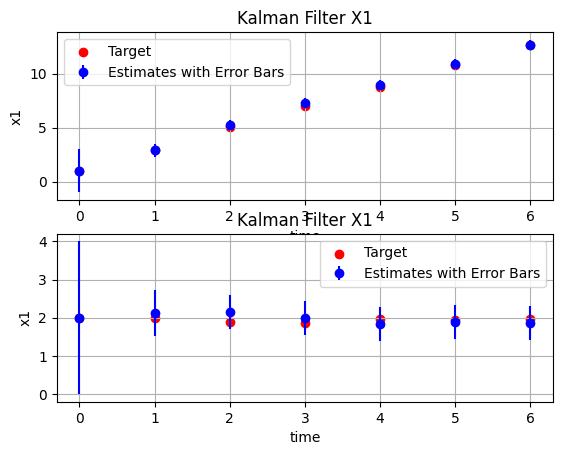

In [862]:
m_k_k = np.array(m_k_k)
covar_k_k = np.array(covar_k_k)
target = np.array(target)
# m_k_k[:,0] gives all x1 vals
errors_x1 = [np.sqrt(cov[0][0])*2 for cov in covar_k_k]
errors_x2 = [np.sqrt(cov[1][1])*2 for cov in covar_k_k]

fig, ax = plt.subplots(2,1)

ax[0].errorbar(time_step,m_k_k[:,0], yerr=errors_x1, fmt='o', label='Estimates with Error Bars', color='blue')
    
ax[0].scatter(time_step,target[:,0], color='red', label='Target', marker='o')

# Set labels and title
ax[0].set_xlabel('time')
ax[0].set_ylabel('x1')
ax[0].set_title('Kalman Filter X1')
ax[0].legend()
ax[0].grid()

ax[1].errorbar(time_step,m_k_k[:,1], yerr=errors_x2, fmt='o', label='Estimates with Error Bars', color='blue')

ax[1].scatter(time_step,target[:,1], color='red', label='Target', marker='o')

# Set labels and title
ax[1].set_xlabel('time')
ax[1].set_ylabel('x2')
ax[1].set_title('Kalman Filter X2')
ax[1].legend()
ax[1].grid()

working now
# takeaways
* never use np.matmul use np.dot, np.matmul is for repeated addition so its for constant, matrix operations if you have two vectors you **need** to use np.dot otherwise you just get the wrong answer
* also multivariate tracking means means multivariate covars why didn't i notice this????? if you have 2 vars you have a 2*2 covariance matrix for each point
* its kind of obvious considering that ofc the uncertainties can be related to eachother, since the dynamics of the system allow for x1=a*x1+b*x2 if you want
